<style type="text/css">
    ol { list-style-type: upper-alpha; }
    p { text-align: center; font-weight: bold; }
</style>

<center>
  <img src=https://i.imgur.com/0TSSaqL.png width="550">
</center>
<center>
  <h3>
<b>CAPSTONE</b><br/><br/>
    <b>Predict H1N1 and Seasonal Flu Vaccines</b><br/><br/>
    <b>GRUPO 3 - Modeling</b><br/><br/>
    <b>Split 70%-30% - All Variables</b>  
  </h3>
</center>

# Contexto

El objetivo es predecir si una persona fue vacunada con la vacuna H1N1 o gripe estacional, de acuerdo a información compartida acerca de su contexto, opiniones y comportamientos a nivel salud.

Después de la fase de EDA (Exploratory Data Analysis), nos quedamos con 32 de las 36 características iniciales:

For all binary variables: 0 = No; 1 = Yes.

*   `h1n1_concern` - Level of concern about the H1N1 flu.
  *   0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
*   `h1n1_knowledge` - Level of knowledge about H1N1 flu.
  *   0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
*   `behavioral_antiviral_meds` - Has taken antiviral medications. (binary)
*   `behavioral_avoidance` - Has avoided close contact with others with flu-like symptoms. (binary)
*   `behavioral_face_mask` - Has bought a face mask. (binary)
*   `behavioral_wash_hands` - Has frequently washed hands or used hand sanitizer. (binary)
*   `behavioral_large_gatherings` - Has reduced time at large gatherings. (binary)
*   `behavioral_outside_home` - Has reduced contact with people outside of own household. (binary)
*   `behavioral_touch_face` - Has avoided touching eyes, nose, or mouth. (binary)
*   `doctor_recc_h1n1` - H1N1 flu vaccine was recommended by doctor. (binary)
*   `doctor_recc_seasonal` - Seasonal flu vaccine was recommended by doctor. (binary)
*   `chronic_med_condition` - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
*   `child_under_6_months` - Has regular close contact with a child under the age of six months. (binary)
*   `health_worker` - Is a healthcare worker. (binary)
*   `health_insurance` - Has health insurance. (binary)
*   `opinion_h1n1_vacc_effective` - Respondent's opinion about H1N1 vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_h1n1_risk` - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_h1n1_sick_from_vacc` - Respondent's worry of getting sick from taking H1N1 vaccine.
  *   1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `opinion_seas_vacc_effective` - Respondent's opinion about seasonal flu vaccine effectiveness.
  *   1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
*   `opinion_seas_risk` - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
  *   1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
*   `opinion_seas_sick_from_vacc` - Respondent's worry of getting sick from taking seasonal flu vaccine.
     1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
*   `age_group` - Age group of respondent.
*   `education` - Self-reported education level.
*   `race` - Race of respondent.
*   `sex` - Sex of respondent.
*   `income_poverty` - Household annual income of respondent with respect to 2008 Census poverty thresholds.
*   `marital_status` - Marital status of respondent.
*   `rent_or_own` - Housing situation of respondent.
*   `employment_status` - Employment status of respondent.
*   `census_msa` - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
*   `household_adults` - Number of other adults in household, top-coded to 3.
*   `household_children` - Number of children in household, top-coded to 3.

# 1. Preparación

En esta fase vamos a cargar y preparar el dataset resultante de la fase de EDA (Exploratory Data Analysis).

Primero importamos las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

plt.style.use('ggplot')

RANDOM_SEED = 42    # Set a random seed for reproducibility!

In [2]:
def print_metrics(y_test, y_pred_result):
  print("Accuracy:", "{:10.4f}".format(accuracy_score(y_test, y_pred_result, normalize=True)))
  print("Precision:", "{:10.4f}".format(precision_score(y_test, y_pred_result)))
  print("Recall:", "{:10.4f}".format(recall_score(y_test, y_pred_result)))
  print("\n", classification_report(y_test, y_pred_result))

In [3]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
)

Cargamos el dataset y exploramos su estructura y datos.

In [4]:
features_df = pd.read_csv('training_set_features_eda_notnulls.csv', index_col="respondent_id")
features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status_0,marital_status_1,rent_or_own_0,rent_or_own_1,employment_status_0,employment_status_1,employment_status_2,census_msa_0,census_msa_1,census_msa_2
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


El dataset tiene 26707 filas y 48 columnas.

In [5]:
features_df.shape

(26707, 48)

Tipos de datos por columna:

In [6]:
features_df.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
age_group_0                    float64
age_group_1                    float64
age_group_2              

In [7]:
features_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status_0,marital_status_1,rent_or_own_0,rent_or_own_1,employment_status_0,employment_status_1,employment_status_2,census_msa_0,census_msa_1,census_msa_2
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,...,0.560265,0.439735,0.777998,0.222002,0.562512,0.383083,0.054405,0.436028,0.294455,0.269517
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,...,0.496364,0.496364,0.415600,0.415600,0.496086,0.486147,0.226820,0.495900,0.455806,0.443717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
labels_df = pd.read_csv("training_set_labels.csv", index_col="respondent_id")
labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


# Split training y evaluation set

In [9]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.30,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

y_train_h1n1 = y_train[['h1n1_vaccine']].copy()
y_train_seasonal = y_train[['seasonal_vaccine']].copy()
y_eval_h1n1 = y_eval[['h1n1_vaccine']].copy()
y_eval_seasonal = y_eval[['seasonal_vaccine']].copy()

# 2. Hyperparameters tuning con GridSearchCV

In [10]:
params_result = pd.DataFrame()

## Naive Bayes

### H1N1

In [11]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

naive_h1n1_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring="roc_auc", verbose=1, cv=10, n_jobs=-1)
naive_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(naive_h1n1_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.02848035868435802)


In [12]:
naive_params_result = pd.DataFrame({'estimator':'naive','target':'h1n1',
                                    'params':naive_h1n1_grid.best_params_,
                                    'score':naive_h1n1_grid.best_score_})
params_result = pd.concat([params_result, naive_params_result])
naive_params_result

,estimator,target,params,score
var_smoothing,naive,h1n1,0.02848,0.80998


### Seasonal

In [13]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

naive_seasonal_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, scoring="roc_auc", verbose=1, cv=10, n_jobs=-1)
naive_seasonal_grid.fit(X_train, y_train_seasonal.values.ravel())

print(naive_seasonal_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.0533669923120631)


In [14]:
naive_params_result = pd.DataFrame({'estimator':'naive','target':'seasonal',
                            'params':naive_seasonal_grid.best_params_,
                            'score':naive_seasonal_grid.best_score_})
params_result = pd.concat([params_result, naive_params_result])
naive_params_result

,estimator,target,params,score
var_smoothing,naive,seasonal,0.053367,0.816363


## Logistic Regression

### H1N1

In [15]:
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100],
    'solver': ['lbfgs','saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

lr = LogisticRegression()
lr_h1n1_grid = GridSearchCV(lr, param_grid, cv=10, scoring="roc_auc", verbose=1)
lr_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(lr_h1n1_grid.best_estimator_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
LogisticRegression(C=0.5, multi_class='multinomial')


In [16]:
lr_params_result = pd.DataFrame({'estimator':'lr','target':'h1n1',
                                 'params':lr_h1n1_grid.best_params_,
                                 'score':lr_h1n1_grid.best_score_})
params_result = pd.concat([params_result, lr_params_result])
lr_params_result

,estimator,target,params,score
C,lr,h1n1,0.5,0.854138
multi_class,lr,h1n1,multinomial,0.854138
penalty,lr,h1n1,l2,0.854138
solver,lr,h1n1,lbfgs,0.854138


### Seasonal

In [17]:
param_grid = {
    'penalty': ['l1', 'l2','elasticnet'],
    'C': [0.1, 0.2, 0.5, 1, 2, 5, 10, 100],
    'solver': ['lbfgs','saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

lr = LogisticRegression()
lr_seasonal_grid = GridSearchCV(lr, param_grid, cv=10)
lr_seasonal_grid.fit(X_train, y_train_seasonal)

print(lr_seasonal_grid.best_estimator_)

LogisticRegression(C=0.5, penalty='l1', solver='saga')


In [18]:
lr_params_result = pd.DataFrame({'estimator':'lr','target':'seasonal',
                                 'params':lr_seasonal_grid.best_params_,
                                 'score':lr_seasonal_grid.best_score_})
params_result = pd.concat([params_result, lr_params_result])
lr_params_result

,estimator,target,params,score
C,lr,seasonal,0.5,0.775169
multi_class,lr,seasonal,auto,0.775169
penalty,lr,seasonal,l1,0.775169
solver,lr,seasonal,saga,0.775169


## SVM

### H1N1

In [19]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

svm_h1n1_grid = GridSearchCV(SVC(), param_grid, refit = True, scoring="roc_auc", verbose = 3)

# fitting the model for grid search
svm_h1n1_grid.fit(X_train, y_train_h1n1)

# print best parameter after tuning
print(svm_h1n1_grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(svm_h1n1_grid.best_estimator_)

# print best_score after hyper-parameter tuning
print(svm_h1n1_grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.726 total time= 1.1min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.733 total time= 1.1min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.739 total time= 1.1min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.715 total time= 1.3min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.729 total time= 1.4min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=  20.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.830 total time=  20.8s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.831 total time=  20.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.835 total time=  15.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.832 total time=  15.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.845 total time=  12.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

In [20]:
svm_params_result = pd.DataFrame({'estimator':'svm','target':'h1n1',
                                  'params':svm_h1n1_grid.best_params_,
                                  'score':svm_h1n1_grid.best_score_})
params_result = pd.concat([params_result, svm_params_result])
svm_params_result

,estimator,target,params,score
C,svm,h1n1,1,0.851652
gamma,svm,h1n1,0.01,0.851652
kernel,svm,h1n1,rbf,0.851652


### Seasonal

In [21]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}

svm_seasonal_grid = GridSearchCV(SVC(), param_grid, refit = True, scoring="roc_auc", verbose = 3)

# fitting the model for grid search
svm_seasonal_grid.fit(X_train, y_train_seasonal)

# print best parameter after tuning
print(svm_seasonal_grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(svm_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.743 total time=  55.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.751 total time=  55.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=  53.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.738 total time=  55.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.745 total time=  55.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=  22.8s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.843 total time=  23.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.841 total time=  23.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.848 total time=  23.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.848 total time=  22.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.838 total time=  21.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

In [22]:
svm_params_result = pd.DataFrame({'estimator':'svm','target':'seasonal',
                                  'params':svm_seasonal_grid.best_params_,
                                  'score':svm_seasonal_grid.best_score_})
params_result = pd.concat([params_result, svm_params_result])
svm_params_result

,estimator,target,params,score
C,svm,seasonal,1,0.854065
gamma,svm,seasonal,0.01,0.854065
kernel,svm,seasonal,rbf,0.854065


## DecisionTreeClassifier

### H1N1

In [23]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_h1n1_grid = GridSearchCV(dt, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
dt_h1n1_grid.fit(X_train, y_train_h1n1)

print(dt_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=42)


In [24]:
df_params_result = pd.DataFrame({'estimator':'dt','target':'h1n1',
                                 'params':dt_h1n1_grid.best_params_,
                                 'score':dt_h1n1_grid.best_score_})
params_result = pd.concat([params_result, df_params_result])
df_params_result

,estimator,target,params,score
ccp_alpha,dt,h1n1,0.001,0.807349
criterion,dt,h1n1,entropy,0.807349
max_depth,dt,h1n1,9,0.807349
max_features,dt,h1n1,auto,0.807349


### Seasonal

In [25]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'ccp_alpha': [0.1, .01, .001],
    'max_depth' : [5, 6, 7, 8, 9],
    'criterion' :['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt_seasonal_grid = GridSearchCV(dt, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
dt_seasonal_grid.fit(X_train, y_train_seasonal)

print(dt_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='auto', random_state=42)


In [26]:
df_params_result = pd.DataFrame({'estimator':'dt','target':'seasonal',
                                 'params':dt_seasonal_grid.best_params_,
                                 'score':dt_seasonal_grid.best_score_})
params_result = pd.concat([params_result, df_params_result])
df_params_result

,estimator,target,params,score
ccp_alpha,dt,seasonal,0.001,0.792845
criterion,dt,seasonal,entropy,0.792845
max_depth,dt,seasonal,8,0.792845
max_features,dt,seasonal,auto,0.792845


## KNeighbors

### H1N1

In [27]:
param_grid = {
    'n_neighbors': list(range(1, 31))
}

kn = KNeighborsClassifier()
kn_h1n1_grid = GridSearchCV(kn, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
kn_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(kn_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
KNeighborsClassifier(n_neighbors=1)


In [28]:
kn_params_result = pd.DataFrame({'estimator':'kn','target':'h1n1',
                                 'params':kn_h1n1_grid.best_params_,
                                 'score':kn_h1n1_grid.best_score_})
params_result = pd.concat([params_result, kn_params_result])
kn_params_result

,estimator,target,params,score
n_neighbors,kn,h1n1,1,NaN


### Seasonal

In [29]:
param_grid = {
    'n_neighbors': list(range(1, 31))
}

kn = KNeighborsClassifier()
kn_seasonal_grid = GridSearchCV(kn, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
kn_seasonal_grid.fit(X_train, y_train_seasonal.values.ravel())

print(kn_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
KNeighborsClassifier(n_neighbors=1)


In [30]:
kn_params_result = pd.DataFrame({'estimator':'kn','target':'seasonal',
                                 'params':kn_seasonal_grid.best_params_,
                                 'score':kn_seasonal_grid.best_score_})
params_result = pd.concat([params_result, kn_params_result])
kn_params_result

,estimator,target,params,score
n_neighbors,kn,seasonal,1,NaN


## RandomForest

### H1N1

In [31]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf_h1n1_grid = GridSearchCV(rf, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
rf_h1n1_grid.fit(X_train, y_train_h1n1.values.ravel())

print(rf_h1n1_grid.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=500, random_state=42)


In [32]:
rf_params_result = pd.DataFrame({'estimator':'rf','target':'h1n1',
                                 'params':rf_h1n1_grid.best_params_,
                                 'score':rf_h1n1_grid.best_score_})
params_result = pd.concat([params_result, rf_params_result])
rf_params_result

,estimator,target,params,score
criterion,rf,h1n1,entropy,0.852615
max_depth,rf,h1n1,8,0.852615
max_features,rf,h1n1,auto,0.852615
n_estimators,rf,h1n1,500,0.852615


### Seasonal

In [33]:
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf_seasonal_grid = GridSearchCV(rf, param_grid, cv=5, scoring="roc_auc", verbose=1, n_jobs=-1)
rf_seasonal_grid.fit(X_train, y_train_seasonal.values.ravel())

print(rf_seasonal_grid.best_estimator_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500,
                       random_state=42)


In [34]:
rf_params_result = pd.DataFrame({'estimator':'rf','target':'seasonal',
                                 'params':rf_seasonal_grid.best_params_,
                                 'score':rf_seasonal_grid.best_score_})
params_result = pd.concat([params_result, rf_params_result])
rf_params_result

,estimator,target,params,score
criterion,rf,seasonal,gini,0.849205
max_depth,rf,seasonal,8,0.849205
max_features,rf,seasonal,auto,0.849205
n_estimators,rf,seasonal,500,0.849205


# 3. Training models

**Mejor algoritmo H1N1:**

* LogisticRegression
* RandomForest
* SVM

**Mejor algoritmo Seasonal:**

* SVM
* LogisticRegression
* K-Neighbors

In [35]:
params_result[params_result['target'] == 'h1n1'].sort_values(by="score", ascending=False)

,estimator,target,params,score
C,lr,h1n1,0.5,0.854138
multi_class,lr,h1n1,multinomial,0.854138
penalty,lr,h1n1,l2,0.854138
solver,lr,h1n1,lbfgs,0.854138
criterion,rf,h1n1,entropy,0.852615
max_depth,rf,h1n1,8,0.852615
max_features,rf,h1n1,auto,0.852615
n_estimators,rf,h1n1,500,0.852615
C,svm,h1n1,1,0.851652
gamma,svm,h1n1,0.01,0.851652


In [36]:
params_result[params_result['target'] == 'seasonal'].sort_values(by="score", ascending=False)

,estimator,target,params,score
C,svm,seasonal,1,0.854065
gamma,svm,seasonal,0.01,0.854065
kernel,svm,seasonal,rbf,0.854065
criterion,rf,seasonal,gini,0.849205
max_depth,rf,seasonal,8,0.849205
max_features,rf,seasonal,auto,0.849205
n_estimators,rf,seasonal,500,0.849205
var_smoothing,naive,seasonal,0.053367,0.816363
ccp_alpha,dt,seasonal,0.001,0.792845
criterion,dt,seasonal,entropy,0.792845


In [37]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['h1n1_concern' 'h1n1_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_h1n1' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_h1n1_vacc_effective' 'opinion_h1n1_risk'
 'opinion_h1n1_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children' 'age_group_0' 'age_group_1' 'age_group_2'
 'age_group_3' 'age_group_4' 'education_0' 'education_1' 'education_2'
 'education_3' 'race_0' 'race_1' 'race_2' 'race_3' 'sex_0' 'sex_1'
 'marital_status_0' 'marital_status_1' 'rent_or_own_0' 'rent_or_own_1'
 'employment_status_0' 'employment_status_1' 'employment_status_2'
 'census_msa_0' 'census_msa_1' 'census_msa_2']


In [38]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

## H1N1

### Algoritmo 1: LogisticRegression

In [39]:
estimator_lr_h1n1 = LogisticRegression(C=0.5, solver='saga', multi_class='multinomial', penalty='l1')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_lr_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator',
                 LogisticRegression(C=0.5, multi_class='multinomial',
                                    penalty='l1', solver='saga'))])

In [40]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_lr_h1n1 = full_pipeline.predict_proba(X_eval)
preds_lr_h1n1

array([[0.97844752, 0.02155248],
       [0.80755594, 0.19244406],
       [0.98733197, 0.01266803],
       ...,
       [0.5559951 , 0.4440049 ],
       [0.27247501, 0.72752499],
       [0.91395655, 0.08604345]])

In [41]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lr_h1n1[:, 1].round())

Accuracy:     0.8490
Precision:     0.7150
Recall:     0.4806

               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6311
           1       0.72      0.48      0.57      1702

    accuracy                           0.85      8013
   macro avg       0.79      0.71      0.74      8013
weighted avg       0.84      0.85      0.84      8013



In [42]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_lr_h1n1[:, 1]):.6f}")

AUC = 0.853924


In [43]:
y_preds_lr_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lr_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_lr_h1n1.shape)
y_preds_lr_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0.021552
3586,0.192444
14114,0.012668
2426,0.960923
13147,0.138117


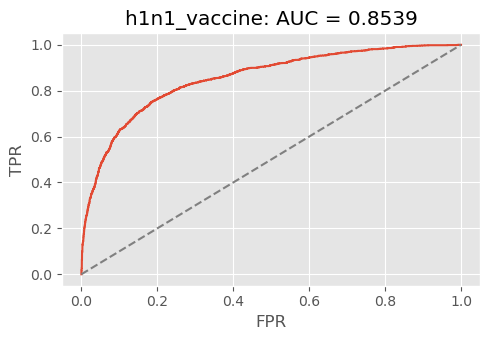

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lr_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[5985  326]
 [ 884  818]]


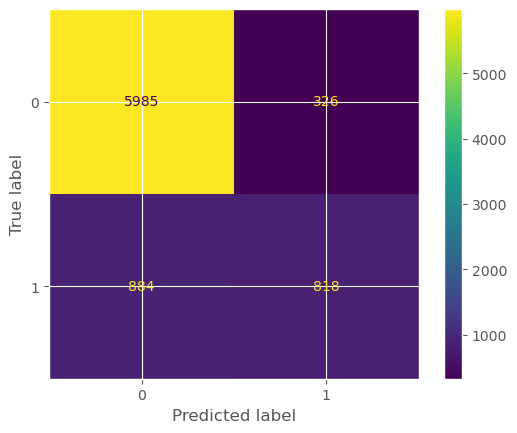

In [45]:
cm = confusion_matrix(y_eval_h1n1, preds_lr_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_lr_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 2: RandomForest

In [46]:
estimator_rf_h1n1 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='auto', max_depth=8, random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rf_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        max_features='auto', n_estimators=500,
                                        random_state=42))])

In [47]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_rf_h1n1 = full_pipeline.predict_proba(X_eval)
preds_rf_h1n1

array([[0.95287882, 0.04712118],
       [0.76440964, 0.23559036],
       [0.95063728, 0.04936272],
       ...,
       [0.54145041, 0.45854959],
       [0.48568377, 0.51431623],
       [0.86847892, 0.13152108]])

In [48]:
print_metrics(y_eval_h1n1, preds_rf_h1n1[:, 1].round())

Accuracy:     0.8443
Precision:     0.8051
Recall:     0.3519

               precision    recall  f1-score   support

           0       0.85      0.98      0.91      6311
           1       0.81      0.35      0.49      1702

    accuracy                           0.84      8013
   macro avg       0.83      0.66      0.70      8013
weighted avg       0.84      0.84      0.82      8013



In [49]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_rf_h1n1[:, 1]):.6f}")

AUC = 0.856697


In [50]:
y_preds_rf_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rf_h1n1[:, 1],
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_rf_h1n1.shape)
y_preds_rf_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0.047121
3586,0.235590
14114,0.049363
2426,0.823410
13147,0.154139


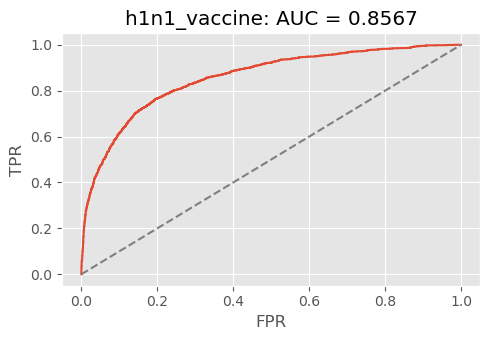

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_h1n1['h1n1_vaccine'],
    y_preds_rf_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[6166  145]
 [1103  599]]


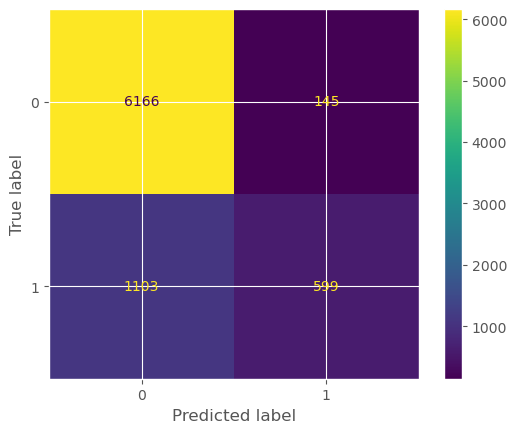

In [52]:
cm = confusion_matrix(y_eval_h1n1, preds_rf_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rf_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 3: SVM

In [53]:
estimator_svm_h1n1 = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_svm_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'age_group_3', 'age_group_4', 'education_0', 'education_1',
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator', SVC(C=1, gamma=0.01, probability=True))])

In [54]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_svm_h1n1 = full_pipeline.predict_proba(X_eval)
preds_svm_h1n1

array([[0.91900139, 0.08099861],
       [0.8160867 , 0.1839133 ],
       [0.91177903, 0.08822097],
       ...,
       [0.63554897, 0.36445103],
       [0.10621137, 0.89378863],
       [0.8993786 , 0.1006214 ]])

In [55]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_svm_h1n1[:, 1].round())

Accuracy:     0.8502
Precision:     0.7442
Recall:     0.4495

               precision    recall  f1-score   support

           0       0.87      0.96      0.91      6311
           1       0.74      0.45      0.56      1702

    accuracy                           0.85      8013
   macro avg       0.81      0.70      0.74      8013
weighted avg       0.84      0.85      0.84      8013



In [56]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_svm_h1n1[:, 1]):.6f}")

AUC = 0.846459


In [57]:
y_preds_svm_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svm_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_svm_h1n1.shape)
y_preds_svm_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0.080999
3586,0.183913
14114,0.088221
2426,0.995822
13147,0.111377


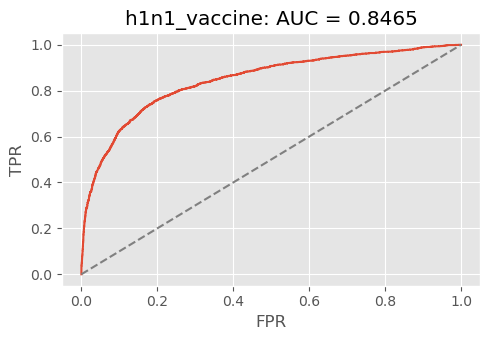

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svm_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[6048  263]
 [ 937  765]]


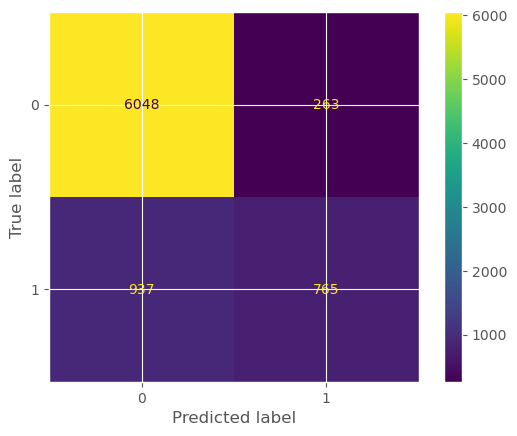

In [59]:
cm = confusion_matrix(y_eval_h1n1, preds_svm_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_svm_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 4: LogisticRegression Balanced

In [60]:
estimator_lrb_h1n1 = LogisticRegression(C=0.5, solver='saga', multi_class='multinomial', 
                                        penalty='l1', class_weight='balanced')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_lrb_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    multi_class='multinomial', penalty='l1',
                                    solver='saga'))])

In [61]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_lrb_h1n1 = full_pipeline.predict_proba(X_eval)
preds_lrb_h1n1

array([[0.9173634 , 0.0826366 ],
       [0.53423529, 0.46576471],
       [0.95272496, 0.04727504],
       ...,
       [0.30091839, 0.69908161],
       [0.10231017, 0.89768983],
       [0.75887858, 0.24112142]])

In [62]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lrb_h1n1[:, 1].round())

Accuracy:     0.7866
Precision:     0.4985
Recall:     0.7673

               precision    recall  f1-score   support

           0       0.93      0.79      0.85      6311
           1       0.50      0.77      0.60      1702

    accuracy                           0.79      8013
   macro avg       0.71      0.78      0.73      8013
weighted avg       0.84      0.79      0.80      8013



In [63]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_lrb_h1n1[:, 1]):.6f}")

AUC = 0.854038


In [64]:
y_preds_lrb_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lrb_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_lrb_h1n1.shape)
y_preds_lrb_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0.082637
3586,0.465765
14114,0.047275
2426,0.988099
13147,0.360095


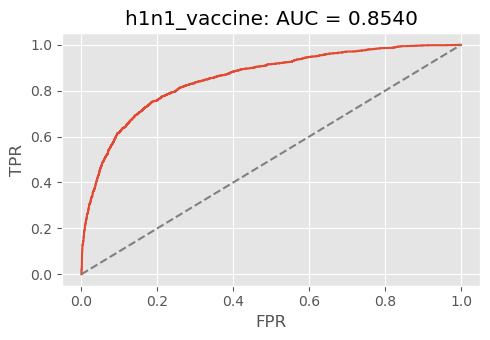

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lrb_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[4997 1314]
 [ 396 1306]]


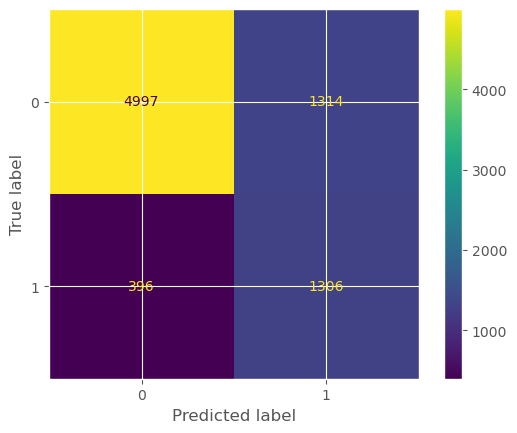

In [66]:
cm = confusion_matrix(y_eval_h1n1, preds_lrb_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_lrb_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 5: RandomForest Balanced

In [67]:
estimator_rfb_h1n1 = RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='auto', max_depth=8,
                                   class_weight='balanced', random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rfb_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=8,
                                        max_features='auto', n_estimators=500,
                                        random_state=42))])

In [68]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_rfb_h1n1 = full_pipeline.predict_proba(X_eval)
preds_rfb_h1n1

array([[0.85316567, 0.14683433],
       [0.53933922, 0.46066078],
       [0.83968061, 0.16031939],
       ...,
       [0.30022294, 0.69977706],
       [0.25042554, 0.74957446],
       [0.66944223, 0.33055777]])

In [69]:
print_metrics(y_eval_h1n1, preds_rfb_h1n1[:, 1].round())

Accuracy:     0.8086
Precision:     0.5361
Recall:     0.7321

               precision    recall  f1-score   support

           0       0.92      0.83      0.87      6311
           1       0.54      0.73      0.62      1702

    accuracy                           0.81      8013
   macro avg       0.73      0.78      0.75      8013
weighted avg       0.84      0.81      0.82      8013



In [70]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_rfb_h1n1[:, 1]):.6f}")

AUC = 0.856714


In [71]:
y_preds_rfb_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rfb_h1n1[:, 1],
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_rfb_h1n1.shape)
y_preds_rfb_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0.146834
3586,0.460661
14114,0.160319
2426,0.934431
13147,0.385282


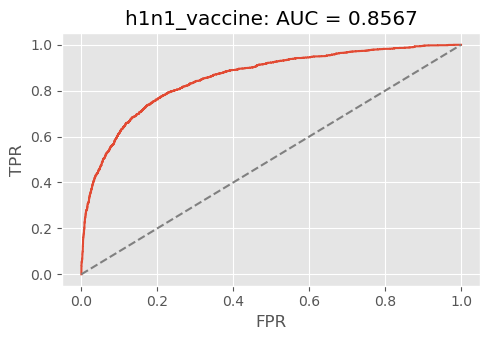

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_h1n1['h1n1_vaccine'],
    y_preds_rfb_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[5233 1078]
 [ 456 1246]]


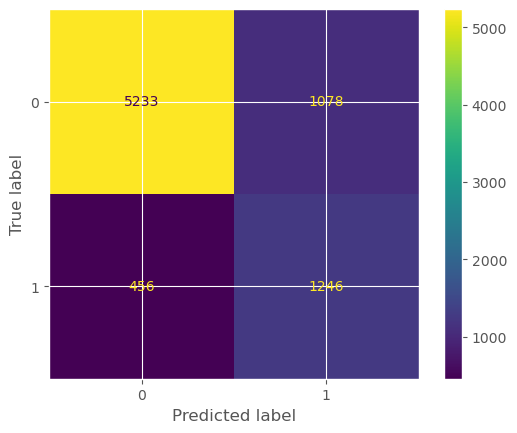

In [73]:
cm = confusion_matrix(y_eval_h1n1, preds_rfb_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rfb_h1n1.classes_)
disp.plot()
plt.show()

### Algoritmo 6: SVM Balanced

In [74]:
estimator_svmb_h1n1 = SVC(C=1, gamma=0.01, kernel='rbf', probability=True, class_weight='balanced')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_svmb_h1n1),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator',
                 SVC(C=1, class_weight='balanced', gamma=0.01,
                     probability=True))])

In [75]:
# Train model
full_pipeline.fit(X_train, y_train_h1n1)

# Predict on evaluation set
preds_svmb_h1n1 = full_pipeline.predict_proba(X_eval)
preds_svmb_h1n1

array([[0.9587255 , 0.0412745 ],
       [0.80406383, 0.19593617],
       [0.98086921, 0.01913079],
       ...,
       [0.46740282, 0.53259718],
       [0.31612698, 0.68387302],
       [0.93807506, 0.06192494]])

In [76]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_svmb_h1n1[:, 1].round())

Accuracy:     0.8451
Precision:     0.6935
Recall:     0.4853

               precision    recall  f1-score   support

           0       0.87      0.94      0.91      6311
           1       0.69      0.49      0.57      1702

    accuracy                           0.85      8013
   macro avg       0.78      0.71      0.74      8013
weighted avg       0.83      0.85      0.83      8013



In [77]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_svmb_h1n1[:, 1]):.6f}")

AUC = 0.858400


In [78]:
y_preds_svmb_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svmb_h1n1[:, 1]
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_svmb_h1n1.shape)
y_preds_svmb_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0.041274
3586,0.195936
14114,0.019131
2426,0.913671
13147,0.105116


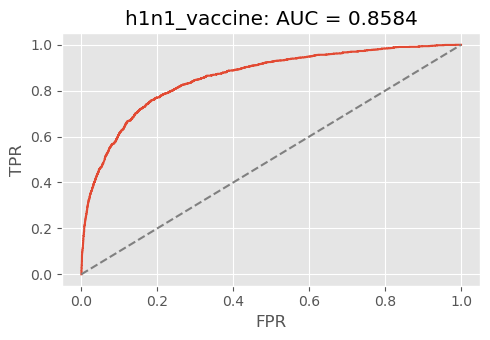

In [79]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svmb_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[5946  365]
 [ 876  826]]


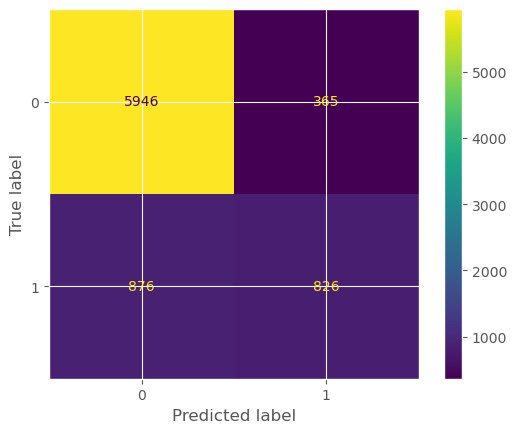

In [80]:
cm = confusion_matrix(y_eval_h1n1, preds_svmb_h1n1[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_svmb_h1n1.classes_)
disp.plot()
plt.show()

## Seasonal

### Algoritmo 1: SVM

In [81]:
estimator_svm_seasonal = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_svm_seasonal),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'age_group_3', 'age_group_4', 'education_0', 'education_1',
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator', SVC(C=1, gamma=0.01, probability=True))])

In [82]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_svm_seasonal = full_pipeline.predict_proba(X_eval)
preds_svm_seasonal

array([[0.88470555, 0.11529445],
       [0.48286235, 0.51713765],
       [0.98099705, 0.01900295],
       ...,
       [0.42237135, 0.57762865],
       [0.0893362 , 0.9106638 ],
       [0.56882937, 0.43117063]])

In [83]:
print_metrics(y_eval_seasonal, preds_svm_seasonal[:, 1].round())

Accuracy:     0.7842
Precision:     0.7883
Recall:     0.7336

               precision    recall  f1-score   support

           0       0.78      0.83      0.80      4282
           1       0.79      0.73      0.76      3731

    accuracy                           0.78      8013
   macro avg       0.78      0.78      0.78      8013
weighted avg       0.78      0.78      0.78      8013



In [84]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_svm_seasonal[:, 1]):.6f}")

AUC = 0.858144


In [85]:
y_preds_svm_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_svm_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_svm_seasonal.shape)
y_preds_svm_seasonal.head()

y_preds.shape: (8013, 1)


,seasonal_vaccine
respondent_id,
7572,0.115294
3586,0.517138
14114,0.019003
2426,0.970165
13147,0.975407


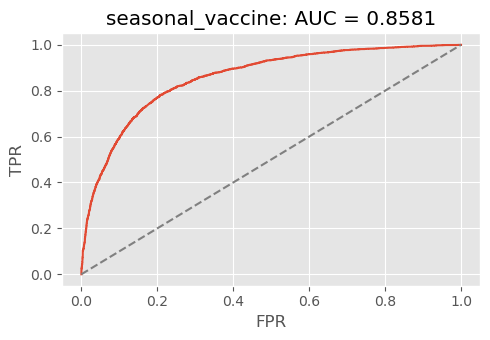

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_svm_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

[[3547  735]
 [ 994 2737]]


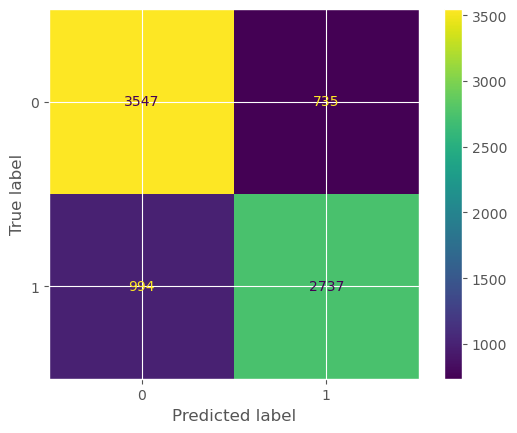

In [87]:
cm = confusion_matrix(y_eval_seasonal, preds_svm_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_svm_seasonal.classes_)
disp.plot()
plt.show()

### Algoritmo 2: RandomForest

In [88]:
estimator_rf_seasonal = RandomForestClassifier(n_estimators=500, max_features='auto', max_depth=8, criterion='entropy', random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rf_seasonal),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator',
                 RandomForestClassifier(criterion='entropy', max_depth=8,
                                        max_features='auto', n_estimators=500,
                                        random_state=42))])

In [89]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_rf_seasonal = full_pipeline.predict_proba(X_eval)
preds_rf_seasonal

array([[0.87447543, 0.12552457],
       [0.39763154, 0.60236846],
       [0.86783887, 0.13216113],
       ...,
       [0.36314459, 0.63685541],
       [0.15352601, 0.84647399],
       [0.55808158, 0.44191842]])

In [90]:
print_metrics(y_eval_seasonal, preds_rf_seasonal[:, 1].round())

Accuracy:     0.7760
Precision:     0.7864
Recall:     0.7124

               precision    recall  f1-score   support

           0       0.77      0.83      0.80      4282
           1       0.79      0.71      0.75      3731

    accuracy                           0.78      8013
   macro avg       0.78      0.77      0.77      8013
weighted avg       0.78      0.78      0.77      8013



In [91]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_rf_seasonal[:, 1]):.6f}")

AUC = 0.852969


In [92]:
y_preds_rf_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_rf_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_rf_seasonal.shape)
y_preds_rf_seasonal.head()

y_preds.shape: (8013, 1)


,seasonal_vaccine
respondent_id,
7572,0.125525
3586,0.602368
14114,0.132161
2426,0.901033
13147,0.884480


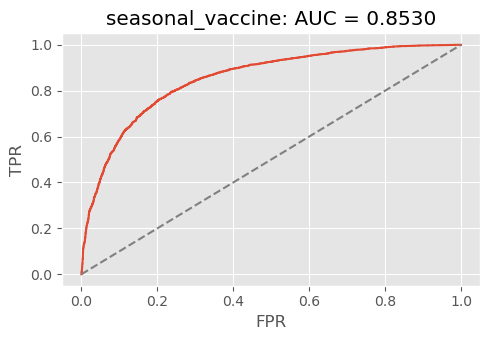

In [93]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_rf_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

[[3560  722]
 [1073 2658]]


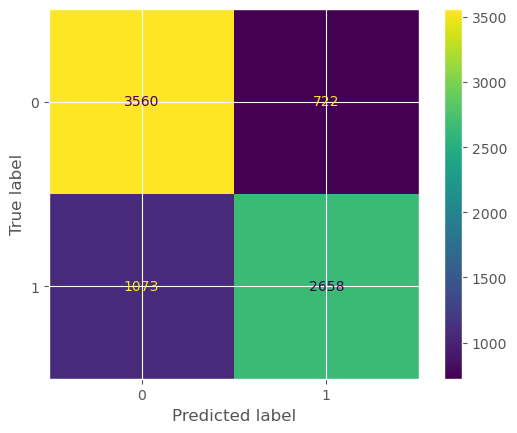

In [94]:
cm = confusion_matrix(y_eval_seasonal, preds_rf_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rf_seasonal.classes_)
disp.plot()
plt.show()

### Algoritmo 3: KNeighbors

In [95]:
estimator_kn_seasonal = KNeighborsClassifier(n_neighbors=30)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_kn_seasonal),
])

full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
       'age_group_3', 'age_group_4', 'education_0', 'education_1',
       'education_2', 'education_3', 'race_0', 'race_1', 'race_2',
       'race_3', 'sex_0', 'sex_1', 'marital_status_0', 'marital_status_1',
       'rent_or_own_0', 'rent_or_own_1', 'employment_status_0',
       'employment_status_1', 'employment_status_2', 'census_msa_0',
       'census_msa_1', 'census_msa_2'], dtype=object))])),
                ('estimator', KNeighborsClassifier(n_neighbors=30))])

In [96]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_kn_seasonal = full_pipeline.predict_proba(X_eval)
preds_kn_seasonal

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
print_metrics(y_eval_seasonal, preds_kn_seasonal[:, 1].round())

In [ ]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_kn_seasonal[:, 1]):.6f}")

In [ ]:
y_preds_kn_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_kn_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_kn_seasonal.shape)
y_preds_kn_seasonal.head()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_kn_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

In [ ]:
cm = confusion_matrix(y_eval_seasonal, preds_kn_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_kn_seasonal.classes_)
disp.plot()
plt.show()

### Algoritmo 4: SVM Balanced

In [ ]:
estimator_svmb_seasonal = SVC(C=1, gamma=0.01, kernel='rbf', probability=True, class_weight='balanced')

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_svmb_seasonal),
])

full_pipeline

In [ ]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_svmb_seasonal = full_pipeline.predict_proba(X_eval)
preds_svmb_seasonal

In [ ]:
print_metrics(y_eval_seasonal, preds_svmb_seasonal[:, 1].round())

In [ ]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_svmb_seasonal[:, 1]):.6f}")

In [ ]:
y_preds_svmb_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_svmb_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_svmb_seasonal.shape)
y_preds_svmb_seasonal.head()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_svmb_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

In [ ]:
cm = confusion_matrix(y_eval_seasonal, preds_svmb_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_svmb_seasonal.classes_)
disp.plot()
plt.show()

### Algoritmo 5: RandomForest Balanced

In [ ]:
estimator_rfb_seasonal = RandomForestClassifier(n_estimators=500, max_features='auto', max_depth=8, 
                                               criterion='entropy', class_weight='balanced', random_state=RANDOM_SEED)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimator", estimator_rfb_seasonal),
])

full_pipeline

In [ ]:
# Train model
full_pipeline.fit(X_train, y_train_seasonal)

# Predict on evaluation set
preds_rfb_seasonal = full_pipeline.predict_proba(X_eval)
preds_rfb_seasonal

In [ ]:
print_metrics(y_eval_seasonal, preds_rfb_seasonal[:, 1].round())

In [ ]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_rfb_seasonal[:, 1]):.6f}")

In [ ]:
y_preds_rfb_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_rfb_seasonal[:, 1],
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_rfb_seasonal.shape)
y_preds_rfb_seasonal.head()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval_seasonal['seasonal_vaccine'],
    y_preds_rfb_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

In [ ]:
cm = confusion_matrix(y_eval_seasonal, preds_rfb_seasonal[:, 1].round())
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator_rfb_seasonal.classes_)
disp.plot()
plt.show()

## MultiOutputClassifier

### Algoritmo 1: Logistic Regression

In [ ]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [ ]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(C=0.5, solver='saga', multi_class='multinomial', penalty='l1')
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

In [ ]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_lr_multi = full_pipeline.predict_proba(X_eval)
preds_lr_multi

In [ ]:
# Classification metrics can't handle a mix of binary and continuous targets
print_metrics(y_eval_h1n1, preds_lr_multi[0][:, 1].round())

In [ ]:
print_metrics(y_eval_seasonal, preds_lr_multi[1][:, 1].round())

In [ ]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_lr_multi[0][:, 1]):.6f}")

In [ ]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_lr_multi[1][:, 1]):.6f}")

In [ ]:
y_preds_lr_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_lr_multi[0][:, 1],
        "seasonal_vaccine": preds_lr_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_lr_multi.shape)
y_preds_lr_multi.head()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_lr_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_lr_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Algoritmo 2: Naive Bayes

In [ ]:
estimators = MultiOutputClassifier(
    estimator=GaussianNB(var_smoothing=0.02848)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

In [ ]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_naive_multi = full_pipeline.predict_proba(X_eval)
preds_naive_multi

In [ ]:
print_metrics(y_eval_h1n1, preds_naive_multi[0][:, 1].round())

In [ ]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_naive_multi[0][:, 1]):.6f}")

In [ ]:
print_metrics(y_eval_seasonal, preds_naive_multi[1][:, 1].round())

In [ ]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_naive_multi[1][:, 1]):.6f}")

In [ ]:
y_preds_naive_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_naive_multi[0][:, 1],
        "seasonal_vaccine": preds_naive_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_naive_multi.shape)
y_preds_naive_multi.head()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_naive_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_naive_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

### Algoritmo 3: SVM

In [ ]:
estimator_svm_multi=SVC(C=1, gamma=0.01, kernel='rbf', probability=True, class_weight='balanced')

estimators = MultiOutputClassifier(
    estimator=estimator_svm_multi
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

In [ ]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_svm_multi = full_pipeline.predict_proba(X_eval)
preds_svm_multi

In [ ]:
print_metrics(y_eval_h1n1, preds_svm_multi[0][:, 1].round())

In [ ]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_svm_multi[0][:, 1]):.6f}")

In [ ]:
print_metrics(y_eval_seasonal, preds_svm_multi[1][:, 1].round())

In [ ]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_svm_multi[1][:, 1]):.6f}")

In [ ]:
y_preds_svm_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_svm_multi[0][:, 1],
        "seasonal_vaccine": preds_svm_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_svm_multi.shape)
y_preds_svm_multi.head()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_svm_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_svm_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [ ]:
cm_h1n1 = confusion_matrix(y_eval_h1n1, preds_svm_multi[0][:, 1].round())
print(cm_h1n1)

cm_seasonal = confusion_matrix(y_eval_seasonal, preds_svm_multi[1][:, 1].round())
print(cm_seasonal)

disp_h1n1 = ConfusionMatrixDisplay(confusion_matrix=cm_h1n1)
disp_seasonal = ConfusionMatrixDisplay(confusion_matrix=cm_seasonal)

fig, ax = plt.subplots(1, 2, figsize=(8, 3.5))

disp_h1n1.plot(ax=ax[0])
disp_seasonal.plot(ax=ax[1])

fig.tight_layout()

### Algoritmo 4: RandomForest

In [ ]:
estimators = MultiOutputClassifier(
    estimator=RandomForestClassifier(n_estimators=500, criterion='entropy', max_features='auto', max_depth=8, random_state=RANDOM_SEED)
)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

In [ ]:
# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds_rf_multi = full_pipeline.predict_proba(X_eval)
preds_rf_multi

In [ ]:
print_metrics(y_eval_h1n1, preds_rf_multi[0][:, 1].round())

In [ ]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_rf_multi[0][:, 1]):.6f}")

In [ ]:
print_metrics(y_eval_seasonal, preds_rf_multi[1][:, 1].round())

In [ ]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_rf_multi[1][:, 1]):.6f}")

In [ ]:
y_preds_rf_multi = pd.DataFrame(
    {
        "h1n1_vaccine": preds_rf_multi[0][:, 1],
        "seasonal_vaccine": preds_rf_multi[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds_rf_multi.shape)
y_preds_rf_multi.head()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_rf_multi['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)
plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_rf_multi['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

# 5.4 Red Neuronal Dense

## 5.4.1 h1n1_vaccine

In [123]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Definir una función para construir el modelo
def build_model(optimizer='adam', activation='relu', hidden_units=16):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model




In [124]:
# Crear un clasificador Keras
model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=32, verbose=0)
# Definir el pipeline
full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])
full_pipeline


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001819DE3A460>)])

In [125]:

# Entrenar el modelo con los parámetros específicos
full_pipeline.fit(X_train, y_train_h1n1)
preds_red_h1n1 = full_pipeline.predict_proba(X_eval)[:, 1]
preds_red_h1n1 #obtengo probabilidades continuas

251/251 [==============================] - 1s 2ms/step


array([0.01926022, 0.14067858, 0.01522977, ..., 0.5795392 , 0.81952363,
       0.04861106], dtype=float32)

In [126]:
umbral = 0.5
preds_red_h1n1_int = (preds_red_h1n1 > umbral).astype(int)
print_metrics(y_eval_h1n1, preds_red_h1n1_int)

Accuracy:     0.8512
Precision:     0.7187
Recall:     0.4924

               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6311
           1       0.72      0.49      0.58      1702

    accuracy                           0.85      8013
   macro avg       0.80      0.72      0.75      8013
weighted avg       0.84      0.85      0.84      8013



In [135]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_red_h1n1_int):.6f}")

AUC = 0.720195


In [148]:
preds_red_h1n1

array([0.01926022, 0.14067858, 0.01522977, ..., 0.5795392 , 0.81952363,
       0.04861106], dtype=float32)

In [149]:
y_preds_red_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_red_h1n1_int
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_red_h1n1.shape)
y_preds_red_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0
3586,0
14114,0
2426,1
13147,0


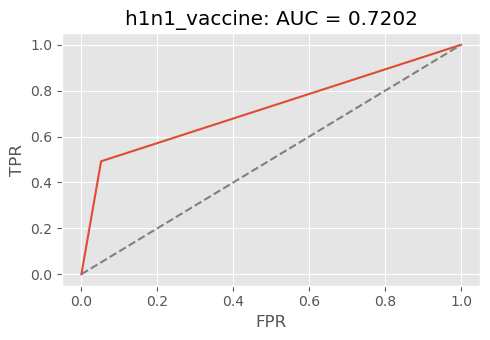

In [150]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_red_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[5983  328]
 [ 864  838]]


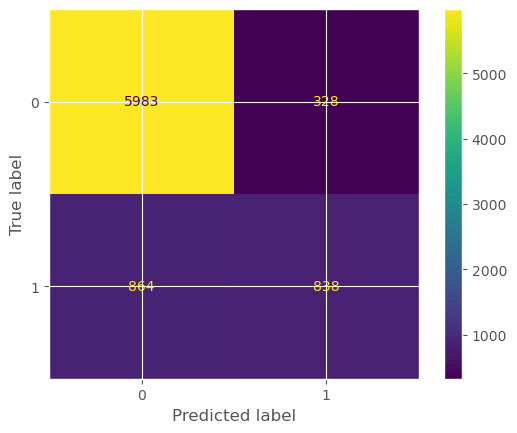

In [152]:
cm = confusion_matrix(y_eval_h1n1, preds_red_h1n1_int)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# 5.4.2 seasonal_vaccine

In [153]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Definir una función para construir el modelo
def build_model(optimizer='adam', activation='relu', hidden_units=16):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Capa de salida para clasificación binaria
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model




In [154]:
# Crear un clasificador Keras para usar con GridSearchCV
model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=32, verbose=0)
# Definir el pipeline
full_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', model)
])
full_pipeline


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001819FC2EFD0>)])

In [155]:
# Entrenar el modelo con los parámetros específicos
full_pipeline.fit(X_train, y_train_seasonal)
preds_red_seasonal = full_pipeline.predict_proba(X_eval)[:, 1]
preds_red_seasonal #obtengo probabilidades continuas

251/251 [==============================] - 0s 2ms/step


array([0.10595062, 0.56721264, 0.01836314, ..., 0.4827998 , 0.914405  ,
       0.39276943], dtype=float32)

In [156]:
umbral = 0.5
preds_red_seasonal_int = (preds_red_seasonal > umbral).astype(int)
print_metrics(y_eval_seasonal, preds_red_seasonal_int)

Accuracy:     0.7822
Precision:     0.7844
Recall:     0.7341

               precision    recall  f1-score   support

           0       0.78      0.82      0.80      4282
           1       0.78      0.73      0.76      3731

    accuracy                           0.78      8013
   macro avg       0.78      0.78      0.78      8013
weighted avg       0.78      0.78      0.78      8013



In [157]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_red_seasonal_int):.6f}")

AUC = 0.779134


In [160]:
y_preds_red_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_red_seasonal_int
    },
    index = y_eval_seasonal.index
)
print("y_preds.shape:", y_preds_red_seasonal.shape)
y_preds_red_seasonal.head()

y_preds.shape: (8013, 1)


,seasonal_vaccine
respondent_id,
7572,0
3586,1
14114,0
2426,1
13147,1


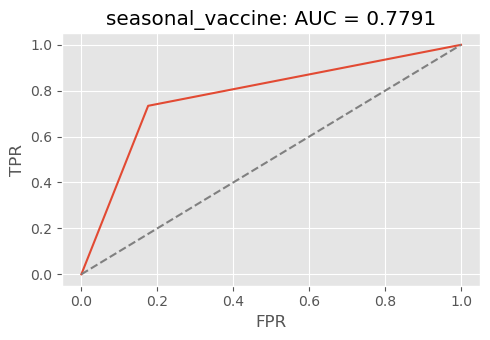

In [162]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_red_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

[[3529  753]
 [ 992 2739]]


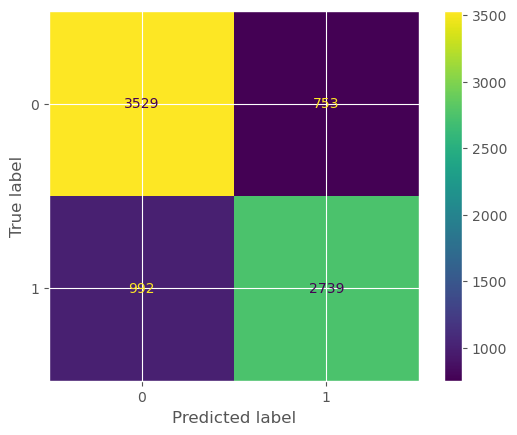

In [163]:
cm = confusion_matrix(y_eval_seasonal, preds_red_seasonal_int)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# 5.4  GradientBoostingClassifier

# 5.4.1 h1n1_vaccine

In [164]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Definir los hiperparámetros
parametros = {
    'criterion': 'friedman_mse',
    'learning_rate': 0.2,
    'loss': 'deviance',
    'max_depth': 5,
    'max_features': 'log2',
    'min_samples_leaf': 0.1,
    'min_samples_split': 0.13636363636363638,
    'n_estimators': 10,
    'subsample': 1.0
}

# Crear el clasificador
clf = GradientBoostingClassifier(**parametros)




In [165]:
 # Entrenar el modelo
clf.fit(X_train, y_train_h1n1)
    
    # Predecir probabilidades
preds_boosting_h1n1  = clf.predict_proba(X_eval)[:, 1]
preds_boosting_h1n1 
    

array([0.08462277, 0.19091369, 0.08584459, ..., 0.36485032, 0.46039919,
       0.184456  ])

In [166]:
umbral = 0.5
preds_boosting_h1n1_int = (preds_boosting_h1n1 > umbral).astype(int)
print_metrics(y_eval_h1n1, preds_boosting_h1n1_int)

Accuracy:     0.8254
Precision:     0.8244
Recall:     0.2262

               precision    recall  f1-score   support

           0       0.83      0.99      0.90      6311
           1       0.82      0.23      0.36      1702

    accuracy                           0.83      8013
   macro avg       0.82      0.61      0.63      8013
weighted avg       0.83      0.83      0.78      8013



In [167]:
print(f"AUC = {roc_auc_score(y_eval_h1n1, preds_boosting_h1n1_int):.6f}")

AUC = 0.606606


In [168]:
preds_boosting_h1n1

array([0.08462277, 0.19091369, 0.08584459, ..., 0.36485032, 0.46039919,
       0.184456  ])

In [169]:
y_preds_boosting_h1n1 = pd.DataFrame(
    {
        "h1n1_vaccine": preds_boosting_h1n1_int
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_boosting_h1n1.shape)
y_preds_boosting_h1n1.head()

y_preds.shape: (8013, 1)


,h1n1_vaccine
respondent_id,
7572,0
3586,0
14114,0
2426,1
13147,0


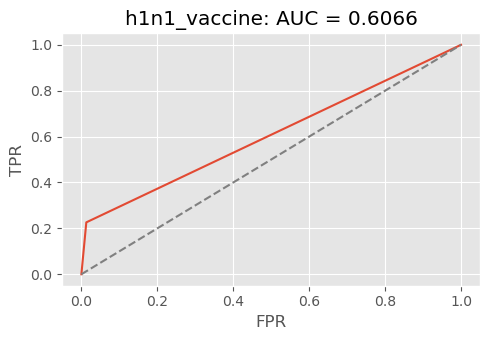

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds_boosting_h1n1['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax
)
fig.tight_layout()

[[6229   82]
 [1317  385]]


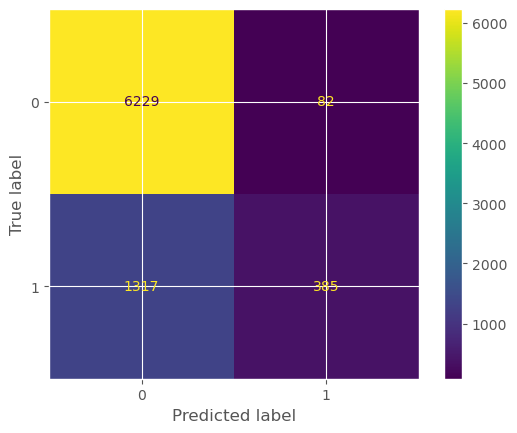

In [171]:
cm = confusion_matrix(y_eval_h1n1, preds_boosting_h1n1_int)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# 5.4.2 Seasonal_vaccine

In [172]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Definir los hiperparámetros
parametros = {
    'criterion': 'friedman_mse',
    'learning_rate': 0.2,
    'loss': 'deviance',
    'max_depth': 5,
    'max_features': 'log2',
    'min_samples_leaf': 0.1,
    'min_samples_split': 0.13636363636363638,
    'n_estimators': 10,
    'subsample': 1.0
}

# Crear el clasificador
clf = GradientBoostingClassifier(**parametros)

In [173]:
 # Entrenar el modelo
clf.fit(X_train, y_train_seasonal)
    
    # Predecir probabilidades
preds_boosting_seasonal  = clf.predict_proba(X_eval)[:, 1]
preds_boosting_seasonal

array([0.18637206, 0.50183278, 0.22432539, ..., 0.46993933, 0.68195661,
       0.43267367])

In [174]:
umbral = 0.5
preds_boosting_seasonal_int = (preds_boosting_seasonal > umbral).astype(int)
print_metrics(y_eval_seasonal, preds_boosting_seasonal_int)

Accuracy:     0.7573
Precision:     0.7602
Recall:     0.6993

               precision    recall  f1-score   support

           0       0.76      0.81      0.78      4282
           1       0.76      0.70      0.73      3731

    accuracy                           0.76      8013
   macro avg       0.76      0.75      0.75      8013
weighted avg       0.76      0.76      0.76      8013



In [175]:
print(f"AUC = {roc_auc_score(y_eval_seasonal, preds_boosting_seasonal_int):.6f}")

AUC = 0.753538


In [176]:
preds_boosting_seasonal

array([0.18637206, 0.50183278, 0.22432539, ..., 0.46993933, 0.68195661,
       0.43267367])

In [177]:
y_preds_boosting_seasonal = pd.DataFrame(
    {
        "seasonal_vaccine": preds_boosting_seasonal_int
    },
    index = y_eval_h1n1.index
)
print("y_preds.shape:", y_preds_boosting_seasonal.shape)
y_preds_boosting_seasonal.head()

y_preds.shape: (8013, 1)


,seasonal_vaccine
respondent_id,
7572,0
3586,1
14114,0
2426,1
13147,1


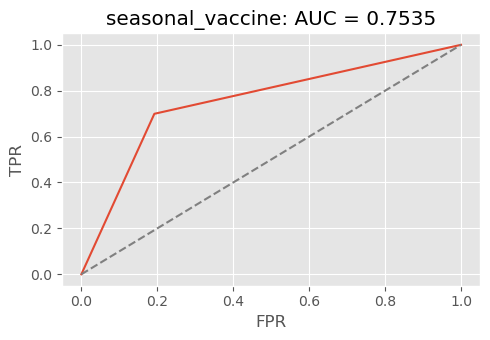

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))

plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds_boosting_seasonal['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax
)
fig.tight_layout()

[[3459  823]
 [1122 2609]]


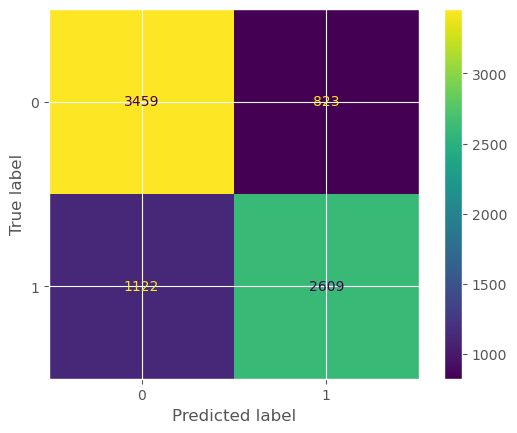

In [179]:
cm = confusion_matrix(y_eval_seasonal, preds_boosting_seasonal_int)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()